In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

In [2]:
# Loading the data
df_customers = pd.read_csv('customers.csv')
df_loans = pd.read_csv('loans.csv')
df_bureau = pd.read_csv('bureau_data.csv')

In [3]:
# checking the size of the data
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
# Combining the different data files
df = pd.merge(df_customers, df_loans, on='cust_id')
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [5]:
# Checking the bureau data
df_bureau.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [6]:
# Merging the data
df = pd.merge(df, df_bureau, on='cust_id')
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [7]:
# Checking the shape of the merged data
df.shape

(50000, 33)

So, data has 50000 rows and 33 columns

In [8]:
# Checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

So, data has both continuous and categorical columns

In [9]:
# Getting the information about default column
df['default'] = df['default'].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

There are 45703 non-default and 4297 default rows

In [10]:
# Getting the information 
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,0,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,0,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,0,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,0,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,0,4,2,120,0,0,5,10


In [11]:
# Splitting the data into train and test
X = df.drop('default', axis=1)
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state=42)

In [12]:
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

In [13]:
# checking the train data
df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
27434,C27435,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,...,2022-04-21,2022-05-21,4,2,90,6,33,8,59,0
13400,C13401,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,...,2020-11-24,2020-12-11,3,1,119,4,17,4,92,0
883,C00884,50,F,Single,Self-Employed,2891000,0,Mortgage,29,Lucknow,...,2019-08-25,2019-09-19,2,1,83,14,78,4,83,0
7303,C07304,43,F,Single,Self-Employed,272000,1,Owned,27,Bangalore,...,2020-04-16,2020-05-05,1,1,37,0,0,5,34,0
45124,C45125,31,F,Single,Salaried,141000,0,Owned,27,Jaipur,...,2024-01-26,2024-02-17,2,0,62,6,28,5,19,0


In [14]:
# Cheking the shape
df_train.shape, df_test.shape

((37500, 33), (12500, 33))

In [15]:
# Checkin the nan columns
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

only 'residence _type' has missing values

In [16]:
# getting uniques values for the residence type
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [17]:
# getting values for residence_type
df_train.residence_type.value_counts()

residence_type
Owned       21114
Mortgage     8901
Rented       7437
Name: count, dtype: int64

In [18]:
# mode value of residence_type
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [19]:
# filling the nan values with mode value of residence type
df_train.residence_type.fillna(mode_residence, inplace=True)
df_train.residence_type.unique()

/var/folders/pn/ttr4mjfn1wn85j77m3skq0km0000gn/T/ipykernel_86517/2552306314.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence, inplace=True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [20]:
# filling the nan values in test dataset with mode values
df_test["residence_type"] = df_test["residence_type"].fillna(mode_residence)

In [21]:
# checking for duplcated values in train dataset
df_train.duplicated().sum()

0

In [22]:
# checking for duplcated values in test dataset
df_test.duplicated().sum()

0

In [23]:
# Getting the columns
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [24]:
# finding the continuous and categorical columns
columns_continuous = [ 'age', 'income', 'number_of_dependants', 'years_at_current_address', 
                       'sanction_amount', 'loan_amount','processing_fee', 'gst', 'net_disbursement', 
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                    'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                   'total_dpd', 'enquiry_count', 'credit_utilization_ratio']
columns_categorical = [ 'gender', 'marital_status', 'employment_status','residence_type', 'city', 
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

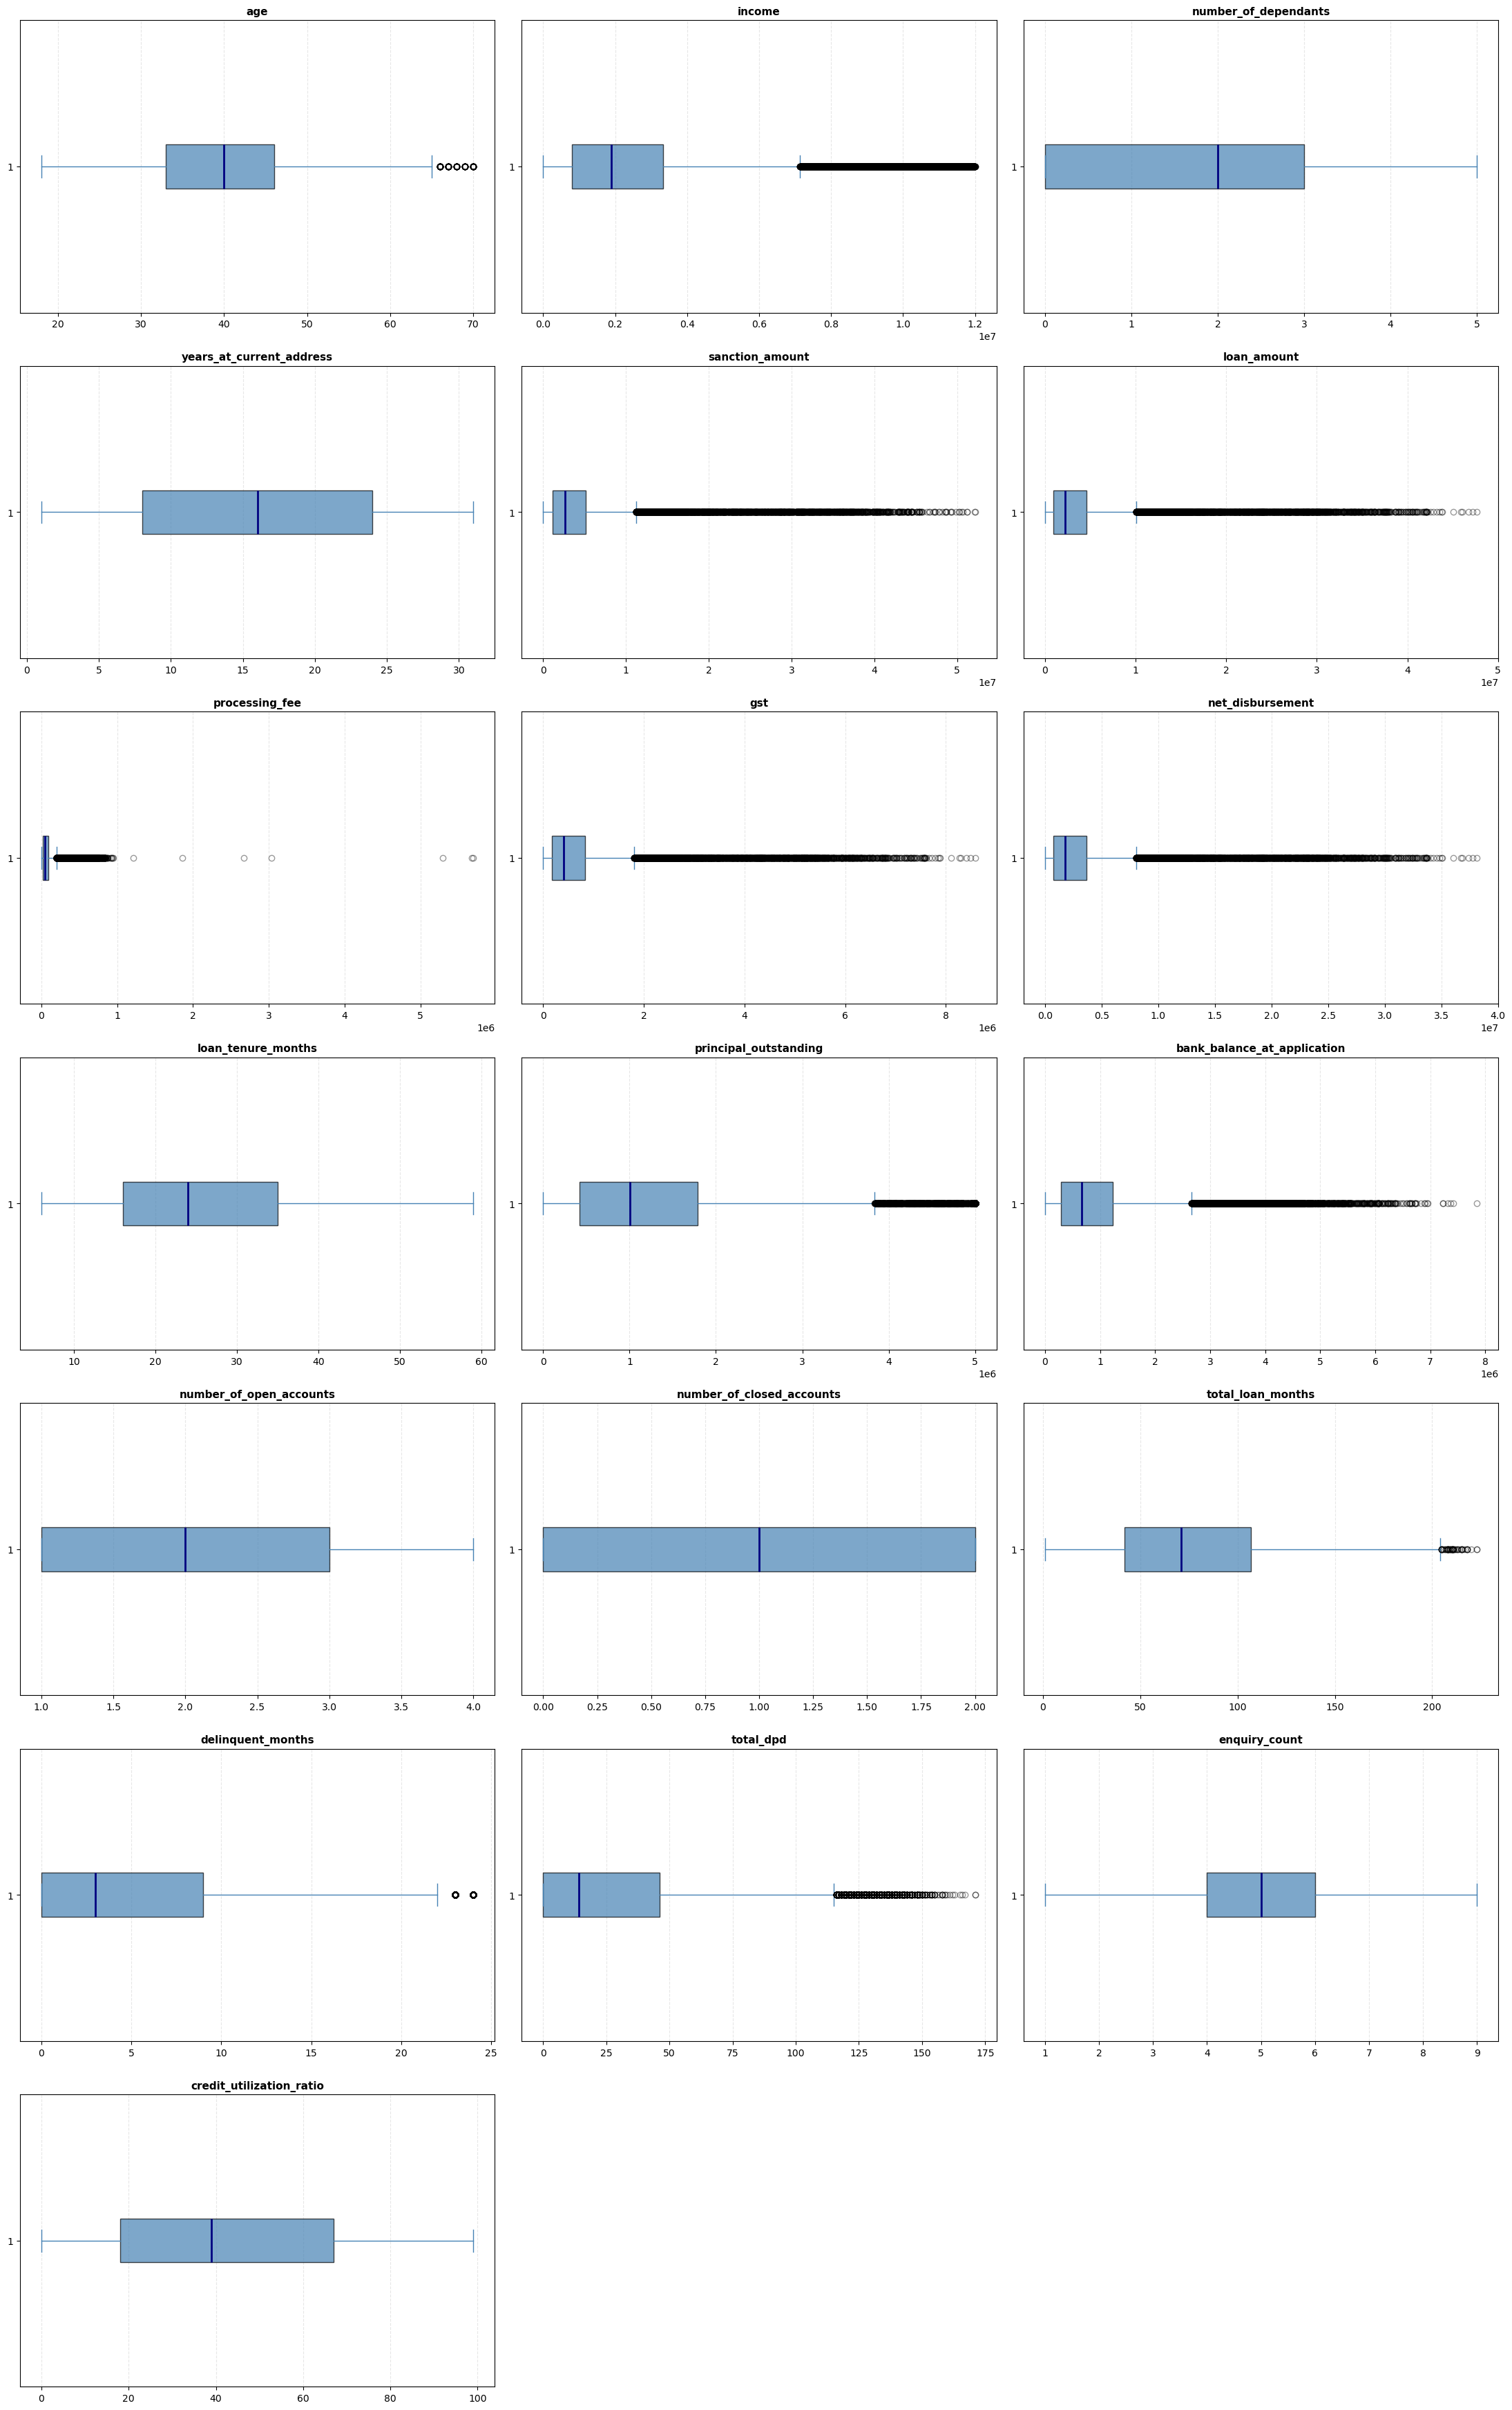

In [25]:
# Plotting the box plot of continous columns 
import math

df_plot = df_train[columns_continuous]

n_cols = 3
n_rows = math.ceil(len(columns_continuous) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(columns_continuous):
    axes[i].boxplot(
        df_plot[col].dropna(),
        vert=False,  # ✅ horizontal box plot
        patch_artist=True,
        boxprops=dict(facecolor='steelblue', alpha=0.7),
        medianprops=dict(color='navy', linewidth=2),
        whiskerprops=dict(color='steelblue'),
        capprops=dict(color='steelblue'),
        flierprops=dict(marker='o', alpha=0.4)
    )

    axes[i].set_title(col, fontsize=11, fontweight='bold')
    axes[i].grid(axis='x', linestyle='--', alpha=0.3)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


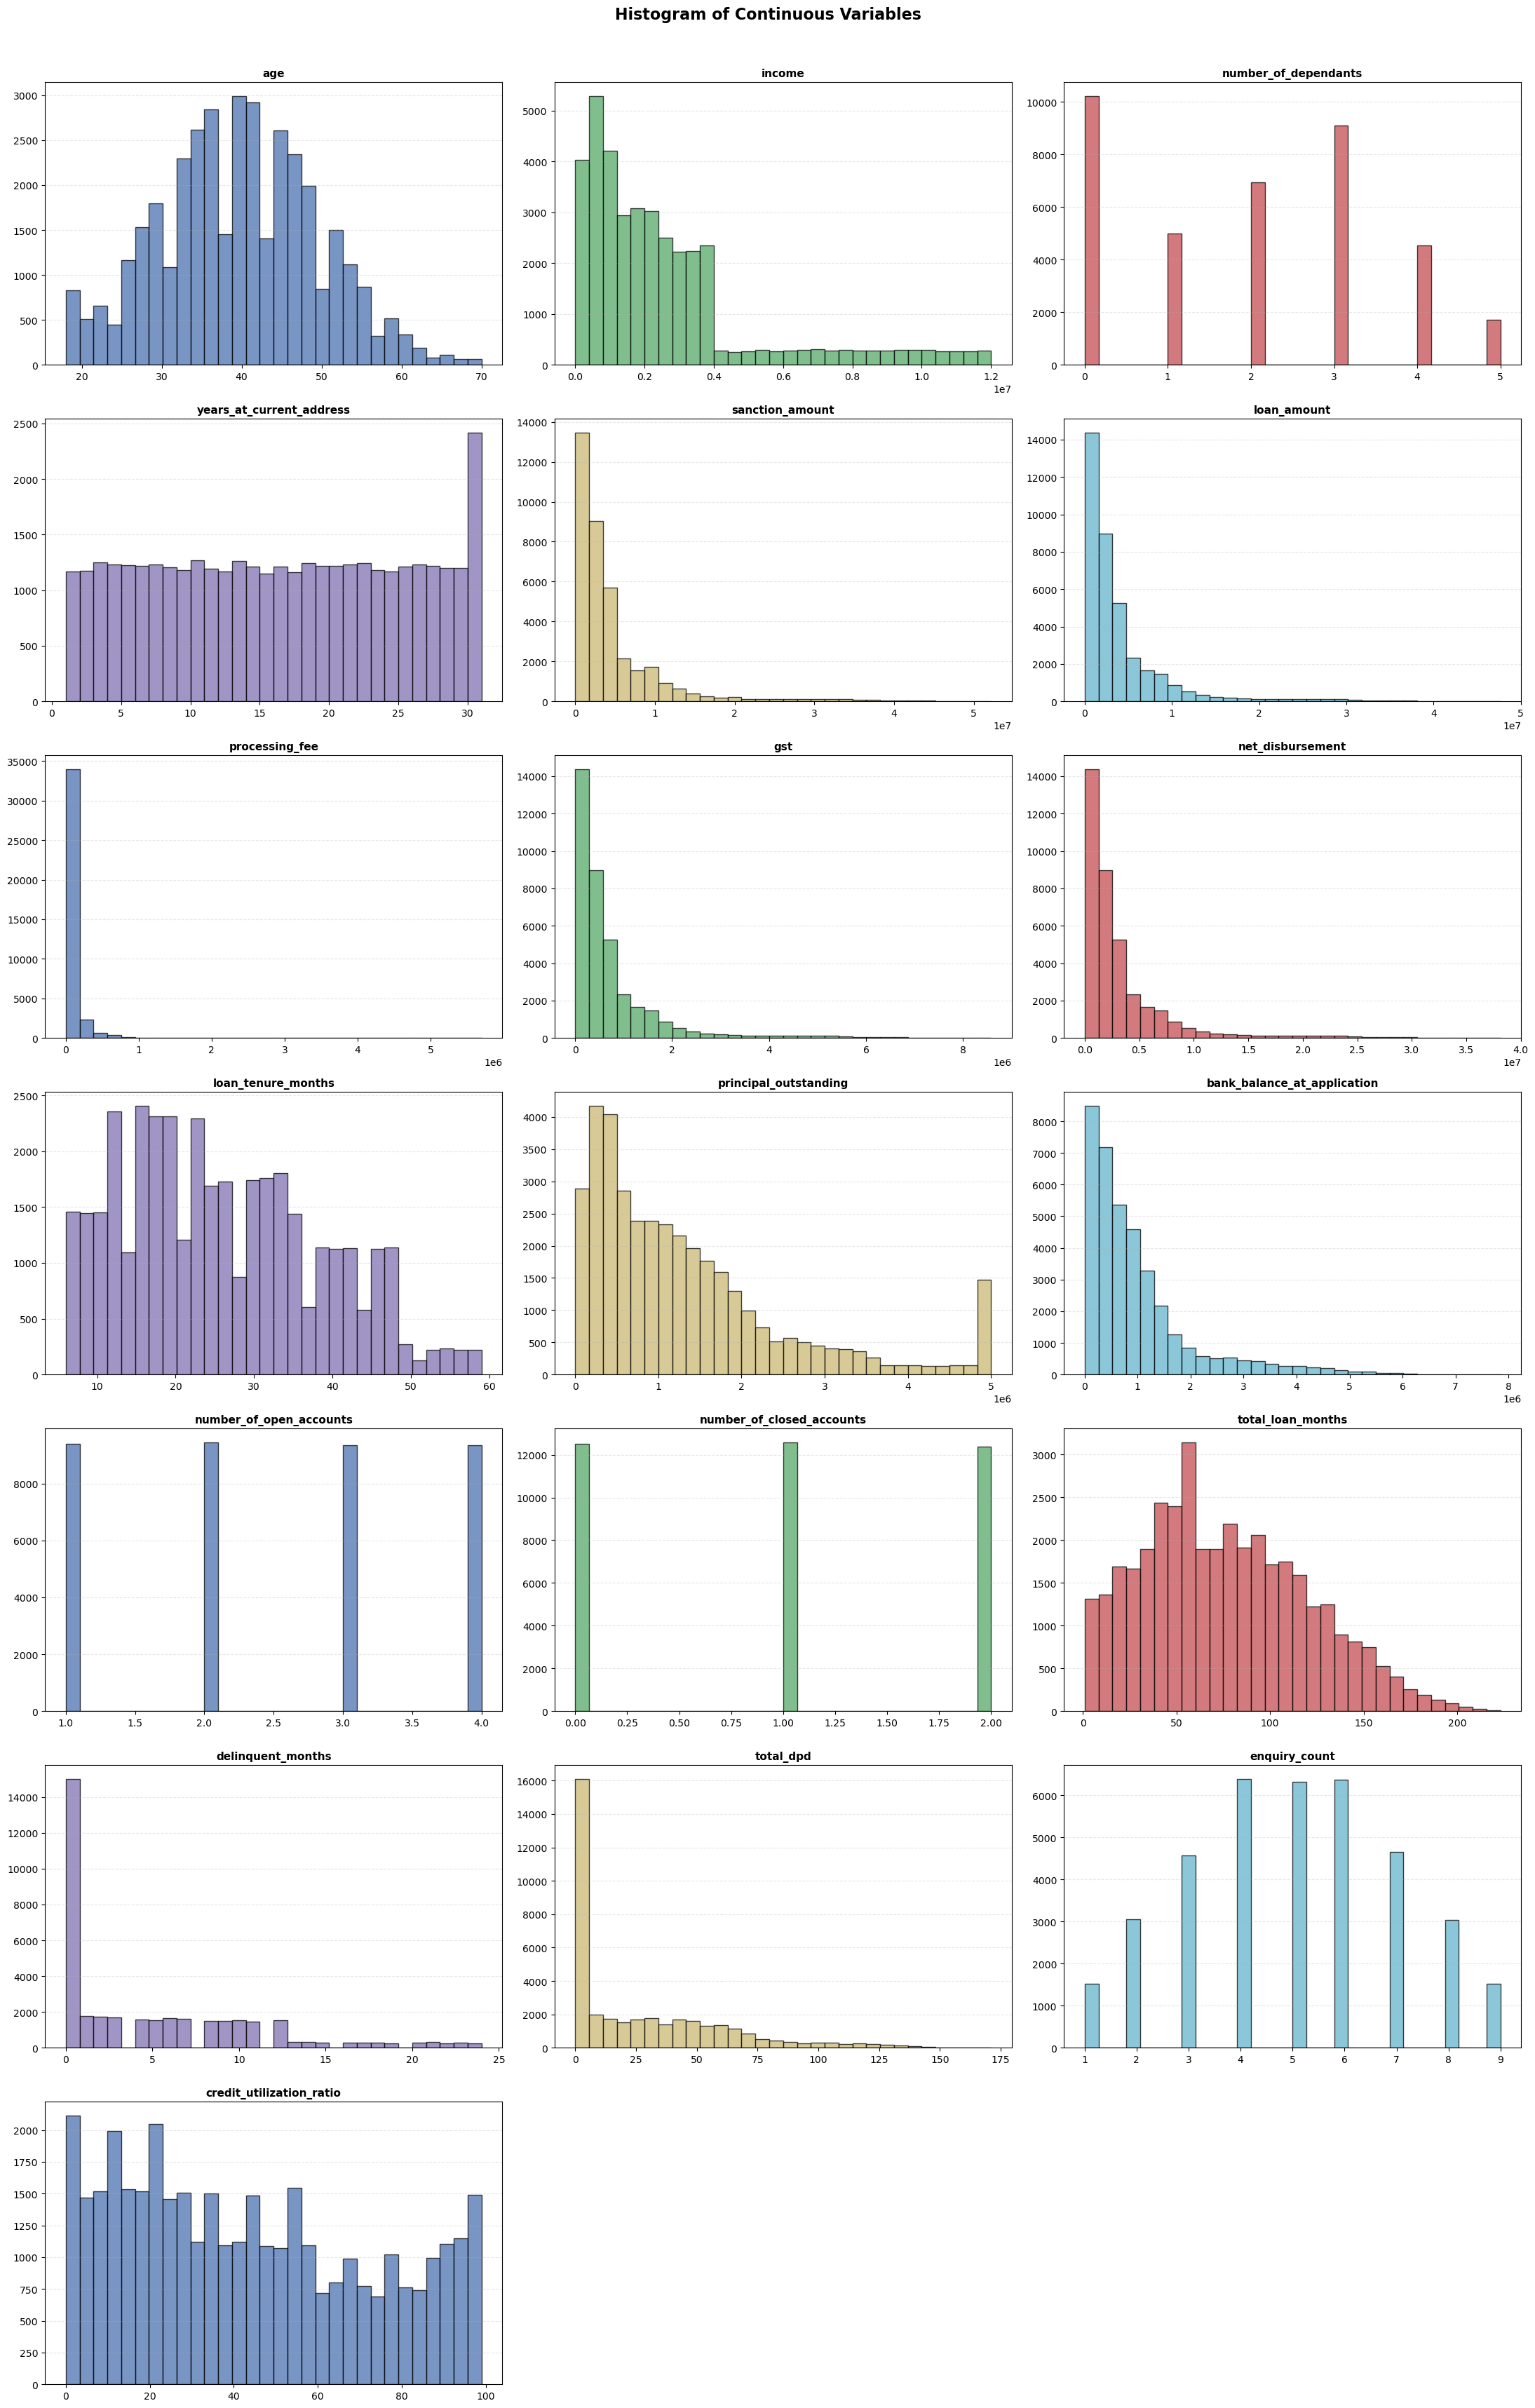

In [26]:
# Plotting the hist plot for continous columns
import matplotlib.pyplot as plt
import math

df_plot = df_train[columns_continuous]

n_cols = 3
n_rows = math.ceil(len(columns_continuous) / n_cols)

colors = [
    "#4C72B0", "#55A868", "#C44E52", "#8172B2",
    "#CCB974", "#64B5CD"
]

fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(columns_continuous):
    axes[i].hist(
        df_plot[col].dropna(),
        bins=30,
        color=colors[i % len(colors)],
        alpha=0.75,
        edgecolor='black'
    )

    axes[i].set_title(col, fontsize=11, fontweight="bold")
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle("Histogram of Continuous Variables", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [27]:
# Getting processsing fee information
df_train.processing_fee.describe()

count     37500.00
mean      80724.11
std      120830.65
min           0.00
25%       19180.00
50%       44700.00
75%       92000.00
max     5698029.90
Name: processing_fee, dtype: float64

In [28]:
# Getting the loan amount and max processing fee
df_train[df_train.processing_fee == df_train.processing_fee.max()][['loan_amount','processing_fee']]

,loan_amount,processing_fee
12294,4639000,5698029.90


In [29]:
# Getting the rows where loan_amount is less than the processing fee
df_train[df_train.processing_fee > df_train.loan_amount][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
9898,3626000,5293543.52
47089,1738000,1858964.77
33705,3812000,5678020.86
12294,4639000,5698029.90
28174,966000,1214492.67
29305,2616000,3036378.01


In [30]:
# Finding the rows where the procesing fee is greater than 3percent of the total loan amount 
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
9898,3626000,5293543.52
47089,1738000,1858964.77
33705,3812000,5678020.86
12294,4639000,5698029.90
28174,966000,1214492.67
29305,2616000,3036378.01


In [31]:
# # Creating the dataset where procesing fee is less than 3percent of the total loan amount 
df_train_1 = df_train[(df_train.processing_fee/df_train.loan_amount)<0.03].copy()
df_train_1[(df_train_1.processing_fee/df_train_1.loan_amount)>0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee


In [32]:
# Finding the rows where the procesing fee is less than 3percent of the total loan amount 
df_test = df_test[df_test.processing_fee/df_test.loan_amount<0.03].copy()
df_test.shape

(12498, 33)

In [33]:
# Getting the category columns
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [34]:
# Finding the unique values for categorical columns
for col in columns_categorical:
    print(col, "-->", df_train_1[col].unique())

gender --> ['F' 'M']
marital_status --> ['Single' 'Married']
employment_status --> ['Salaried' 'Self-Employed']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state --> ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
zipcode --> [380001 110001 226001 560001 302001 500001 700001 411001 600001 400001]
loan_purpose --> ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


In [35]:
# Replacing the incorrect information with the correct information 
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal','Personal')
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal','Personal')

In [36]:
# Checking the dataset
df_train_1['loan_purpose'].unique()

array(['Home', 'Auto', 'Personal', 'Education'], dtype=object)

In [37]:
# Checking the dataset
df_train_1.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
27434,C27435,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,...,2022-04-21,2022-05-21,4,2,90,6,33,8,59,0
13400,C13401,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,...,2020-11-24,2020-12-11,3,1,119,4,17,4,92,0
883,C00884,50,F,Single,Self-Employed,2891000,0,Mortgage,29,Lucknow,...,2019-08-25,2019-09-19,2,1,83,14,78,4,83,0
7303,C07304,43,F,Single,Self-Employed,272000,1,Owned,27,Bangalore,...,2020-04-16,2020-05-05,1,1,37,0,0,5,34,0
45124,C45125,31,F,Single,Salaried,141000,0,Owned,27,Jaipur,...,2024-01-26,2024-02-17,2,0,62,6,28,5,19,0
